# EDA - Anikait Kapur

## Description
My EDA will focus on the efficecy of Lockdown comapred to the heard immmunity. Furthermore, I will also be breifly investigate whether or not a nationwide lockdown was a good way to fight covid-19. I will be focusing on India because it had one of the biggest nation wide lockdown during this pandemic. Furthermore, during its unlock phase, India implemented heard immunity alongside with minor measures such as masks and social distancing. For the Herd Immunity Investigation, I will also be looking at the US.

## Importing Libraries and Loading Data

In [80]:
# Imported Items
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def loadingProcessing(path):
    data = pd.read_csv(path)
    return data
df = loadingProcessing("C:\\Users\\kapur\\Downloads\\DATA.csv")

print(df)

             Date      Country  Population  Total_Tests  Total_Cases  \
0      2020/04/19  Afghanistan    39119903         6422          996   
1      2020/04/20  Afghanistan    39119903         6422         1026   
2      2020/04/21  Afghanistan    39119903         6422         1092   
3      2020/04/22  Afghanistan    39119903         6422         1176   
4      2020/04/23  Afghanistan    39119903         6422         1279   
...           ...          ...         ...          ...          ...   
25333  2020/09/16     Zimbabwe    14911008       156133         7598   
25334  2020/09/17     Zimbabwe    14911008       157144         7633   
25335  2020/09/18     Zimbabwe    14911008       157144         7647   
25336  2020/09/19     Zimbabwe    14911008       157144         7672   
25337  2020/09/20     Zimbabwe    14911008       157772         7683   

       Total_Deaths  Total_Recovered  Active_Cases  New Cases  New Deaths  \
0                33              131           832        

## Wranlging Data
- Isolating India and the data during the lockdown

In [67]:
df_India = df[df["Country"] == "India"]
df_India["Date"] = pd.to_datetime(df_India["Date"])
df_India_lockdown = df_India.head(44)
##I noticed that each row represents 1 day. Therefore, i figured out the number of days till the lockdown eneded from the start of the dataset

C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## Removing unwanted columns and adding new columns

In [70]:
percentage = (df_India_lockdown["Active_Cases"] / df_India_lockdown["Population"]) * 100
df_India_lockdown["%Active"] = percentage


def dailyCases():
    cases = list(df_India_lockdown["Total_Cases"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df_India_lockdown["Daily_cases"] = daily_cases1
    
dailyCases()
df_India_lockdown1 = df_India_lockdown.drop(labels = ["Total_Deaths", "Total_Tests", "Population", "Total_Recovered","Active_Cases", "New Cases", "New Deaths"], axis = 1)
df_India_lockdown1 = df_India_lockdown1.dropna().reset_index(drop = True)


df_India_lockdown1

,Date,Country,Total_Cases,Percentage_Positive,%Active,Daily_cases
0,2020-04-18,India,16365,0.001183,0.000968,0
1,2020-04-19,India,17615,0.001274,0.001027,1250
2,2020-04-20,India,18539,0.001340,0.001061,924
3,2020-04-21,India,20080,0.001452,0.001118,1541
4,2020-04-22,India,21370,0.001545,0.001180,1290
5,2020-04-23,India,23039,0.001666,0.001251,1669
6,2020-04-24,India,24447,0.001768,0.001314,1408
7,2020-04-25,India,26283,0.001900,0.001411,1836
8,2020-04-26,India,27890,0.002017,0.001481,1607
9,2020-04-27,India,29451,0.002129,0.001545,1561


# Analysing the Data


## Research Questions:
   1. Did the lockdown in india have a postive effect on the new cases?
   2. Was herd immunity a viable option for dealing with Covid-19?





Given that the data is numerical for the most part, it would be good to get a summury of the data

In [4]:
df_India_lockdown1.describe(include=[np.number])


,Total_Cases,%Active,Daily_cases
count,44.000000,44.000000,44.000000
mean,355707.954545,0.010936,12873.022727
std,165996.600809,0.003750,5451.258726
min,131423.000000,0.005290,0.000000
25%,214415.750000,0.007611,8811.250000
50%,327317.000000,0.010950,11351.000000
75%,477531.250000,0.013545,17198.750000
max,697836.000000,0.018311,24015.000000


         Date Country  Total_Cases  Percentage_Positive   %Active  Daily_cases
0  2020-04-18   India        16365             0.001183  0.000968            0
1  2020-04-19   India        17615             0.001274  0.001027         1250
2  2020-04-20   India        18539             0.001340  0.001061          924
3  2020-04-21   India        20080             0.001452  0.001118         1541
4  2020-04-22   India        21370             0.001545  0.001180         1290
5  2020-04-23   India        23039             0.001666  0.001251         1669
6  2020-04-24   India        24447             0.001768  0.001314         1408
7  2020-04-25   India        26283             0.001900  0.001411         1836
8  2020-04-26   India        27890             0.002017  0.001481         1607
9  2020-04-27   India        29451             0.002129  0.001545         1561
10 2020-04-28   India        31324             0.002265  0.001632         1873
11 2020-04-29   India        33062             0.002

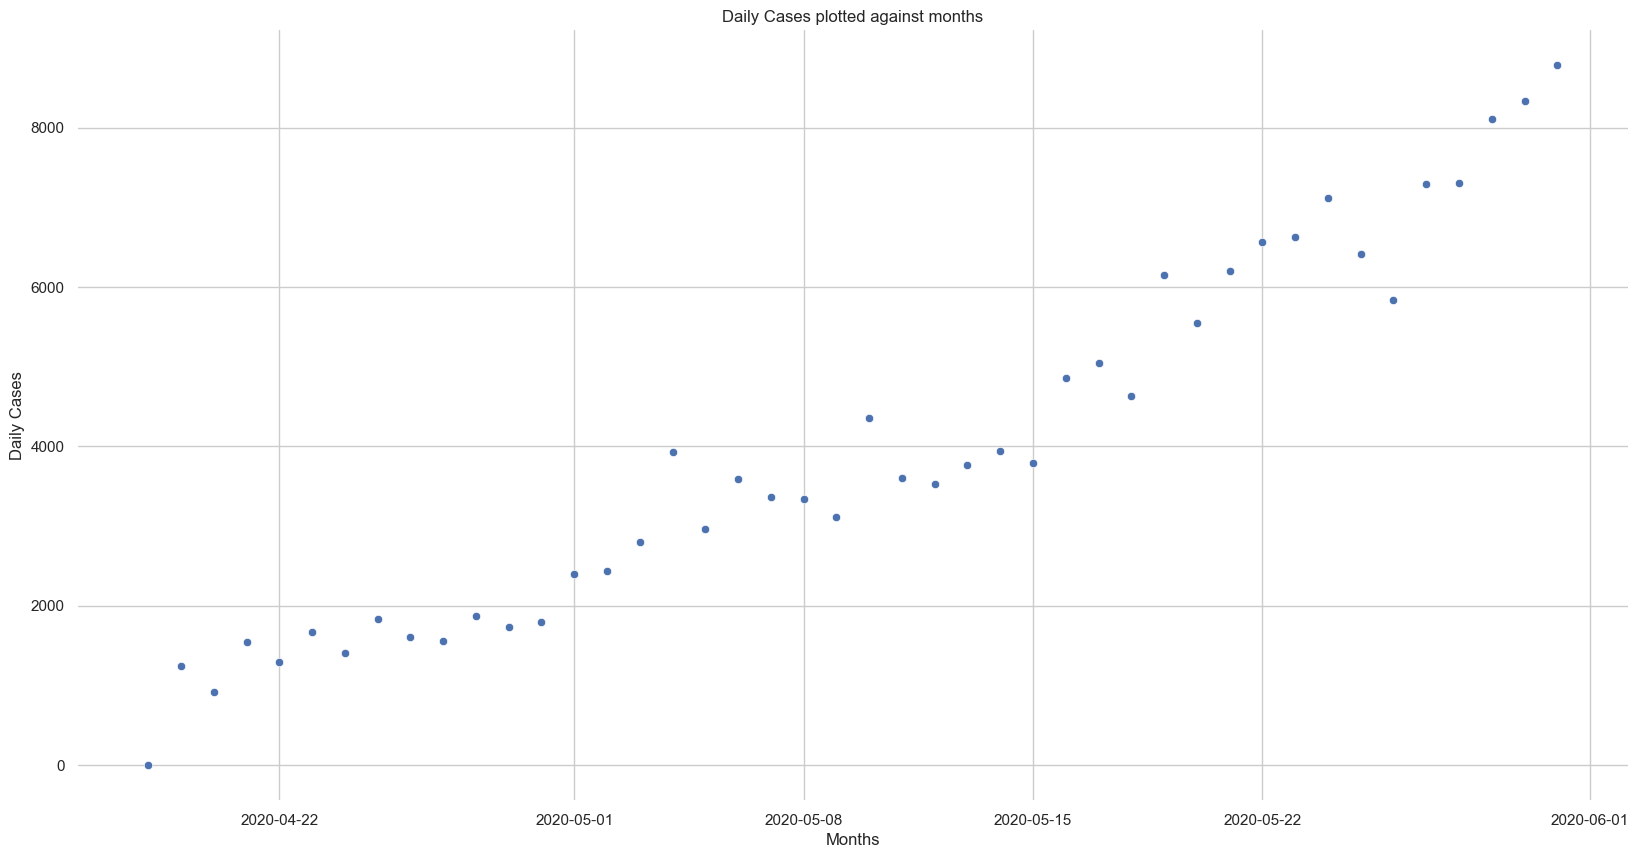

In [71]:
#A scatter plot is a good visualisation of the daily new cases
sns.set_style("whitegrid")
print(df_India_lockdown1)
plot1 = sns.scatterplot(x = "Date", y = "Daily_cases", data = df_India_lockdown1, legend = "full")
plot1.set(xlabel = "Months", ylabel = "Daily Cases", title = "Daily Cases plotted against months")
sns.set(rc = {'figure.figsize':(20,10)})
sns.despine(left=True, bottom=True)
plt.show()


This scatter plot clearly shows that during the lockdown period, there was consistant rise in daily cases. This in turn suggests that the lockdown did not have a positive effect on the daily cases. 

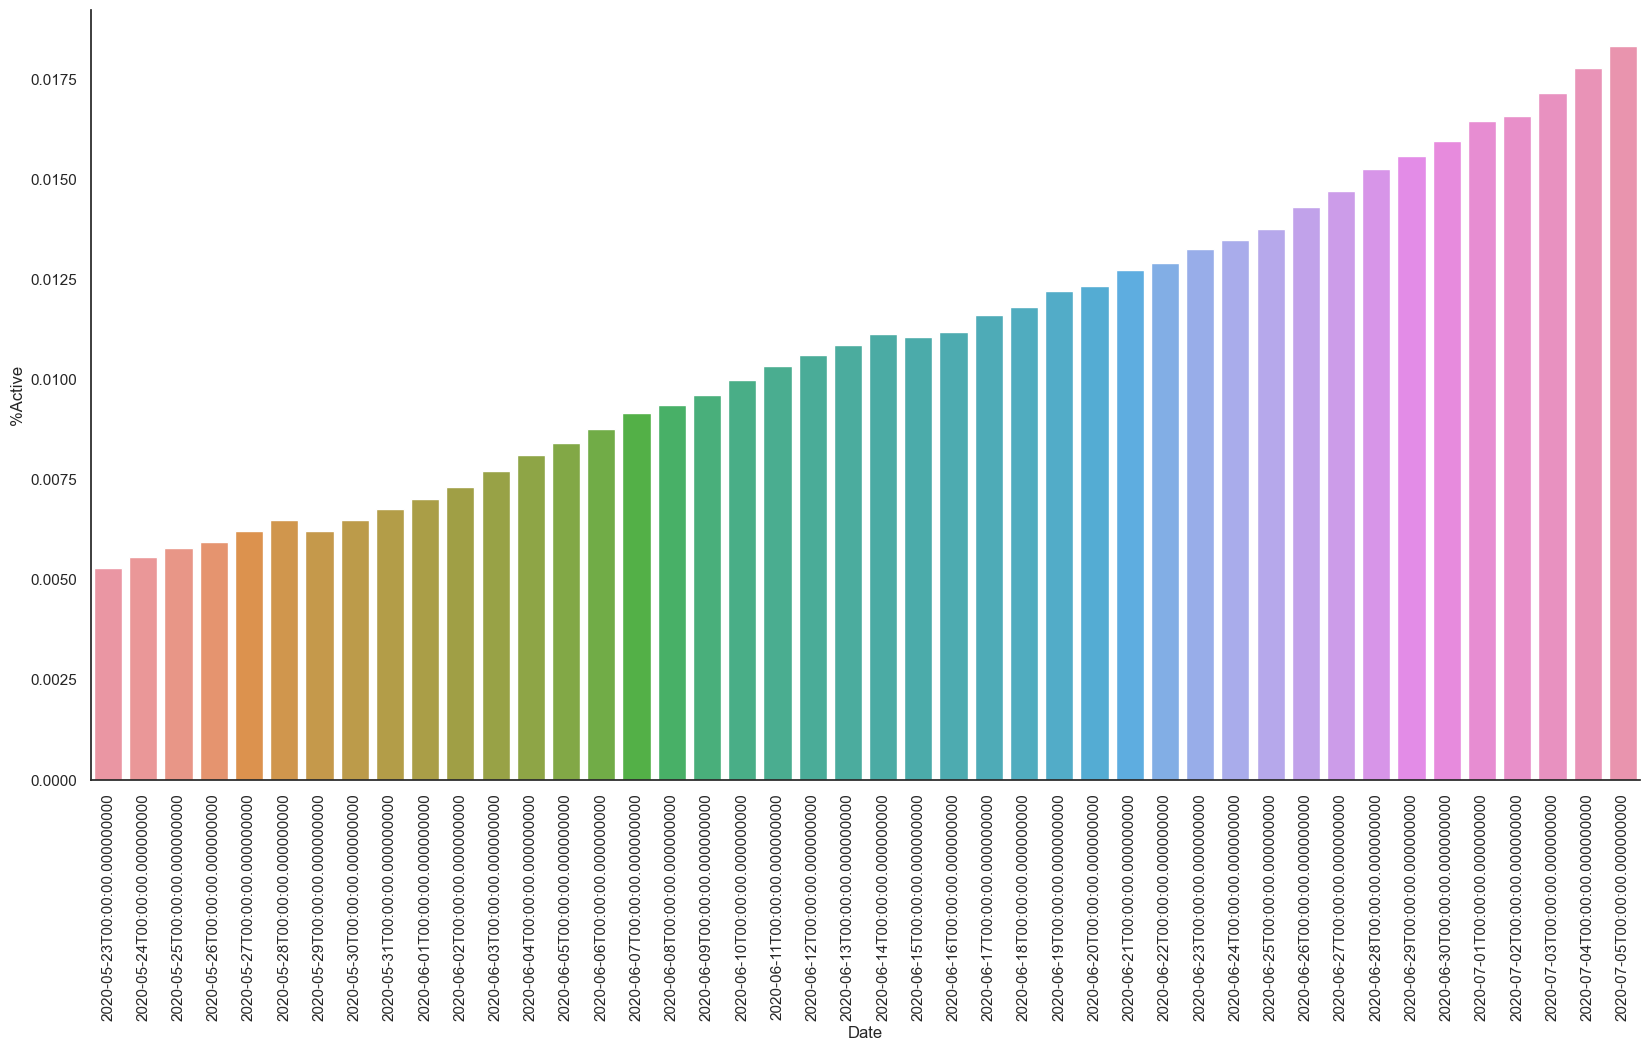

In [19]:
sns.set_style("white") 
plot2 = sns.barplot(x = "Date", y = "%Active", data = df_India_lockdown1, )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
sns.despine()

plt.show()


Much like the daily cases, the percentage postive cases are increasing. However, when looking at their quantitative value, during lockdown, the highest percentage positive population is less than 0.007% which in turn can be used as evidence that the lockdown possibly had a positive effective. 

# Herd Immunity

Herd Immunity can be investigated in a similar manner to the Lockdown. I will also be looking at the US in order to get further evidence of the effectivness of herd immunity.

In [79]:

df = loadingProcessing("C:\\Users\\kapur\\Downloads\\Anikait_Data.csv")

df_herd = df[(df["Country"] == "India") | (df["Country"] == "USA")]
df_herd = df_herd.reset_index(drop = True)

df_herd_India = df_herd[df_herd["Country"] == "India"]
df_herd_US = df_herd[df_herd["Country"] == "USA"]


df_herd["Date"] = pd.to_datetime(df_herd["Date"])
df_Herd1 = df_herd[df_herd["Date"] > '2020-05-31']
df_Herd1.drop(labels = ["Total_Tests"], axis = 1,inplace = True)
df_Herd1["%Active"] = (df_Herd1["Active_Cases"]/df_Herd1["Population"]) * 100

df_Herd1 = df_Herd1.dropna().reset_index(drop = True)
df_Herd1.drop(labels = "Population", axis = 1, inplace = True)





def dailyDeaths_and_dailyCases(dataframe):
    df = dataframe
    cases = list(df["Total_Deaths"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df["Daily_deaths"] = daily_cases1
    cases = list(df["Total_Cases"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df["Daily_cases"] = daily_cases1
    return df


df_herd_India = dailyDeaths_and_dailyCases(df_herd_India)
df_herd_US = dailyDeaths_and_dailyCases(df_herd_US)

print(df_Herd1)

##The lockdown in India ended on May 31. Therefore, will be looking at data after that date.


C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


         Date Country  Total_Cases  Total_Deaths  Total_Recovered  \
0  2020-06-06   India     246622.0        6946.0         118695.0   
1  2020-09-06   India     274780.0        7719.0         134165.0   
2  2020-12-06   India     309603.0        8890.0         154231.0   
3  2020-06-14   India     333008.0        9520.0         169689.0   
4  2020-06-16   India     354161.0       11921.0         187552.0   
..        ...     ...          ...           ...              ...   
88 2020-09-16     USA    6828301.0      201348.0        4119158.0   
89 2020-09-17     USA    6874596.0      202213.0        4155039.0   
90 2020-09-18     USA    6925941.0      203171.0        4191894.0   
91 2020-09-19     USA    6967403.0      203824.0        4223693.0   
92 2020-09-20     USA    7009844.0      204118.0        4251489.0   

    Active_Cases  New Cases  New Deaths  Percentage_Positive  \
0       120981.0    10438.0       297.0             0.017832   
1       132896.0     8852.0       246.0    

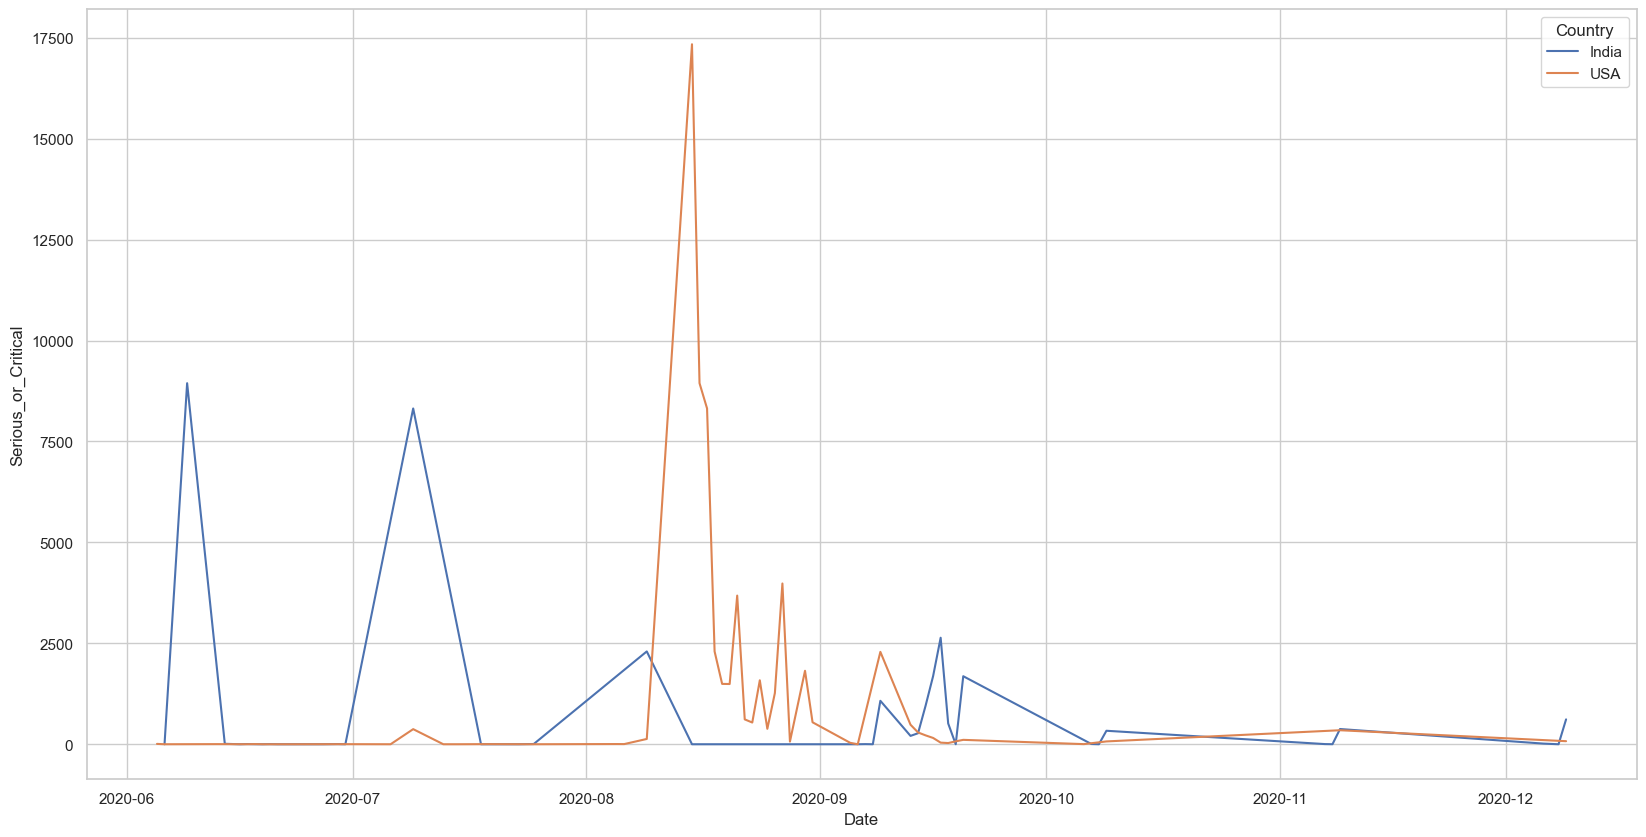

In [78]:
sns.set_style("whitegrid")
plot2 = sns.lineplot(x = "Date", y = "Serious_or_Critical", hue = "Country", data = df_Herd1)
plt.show()

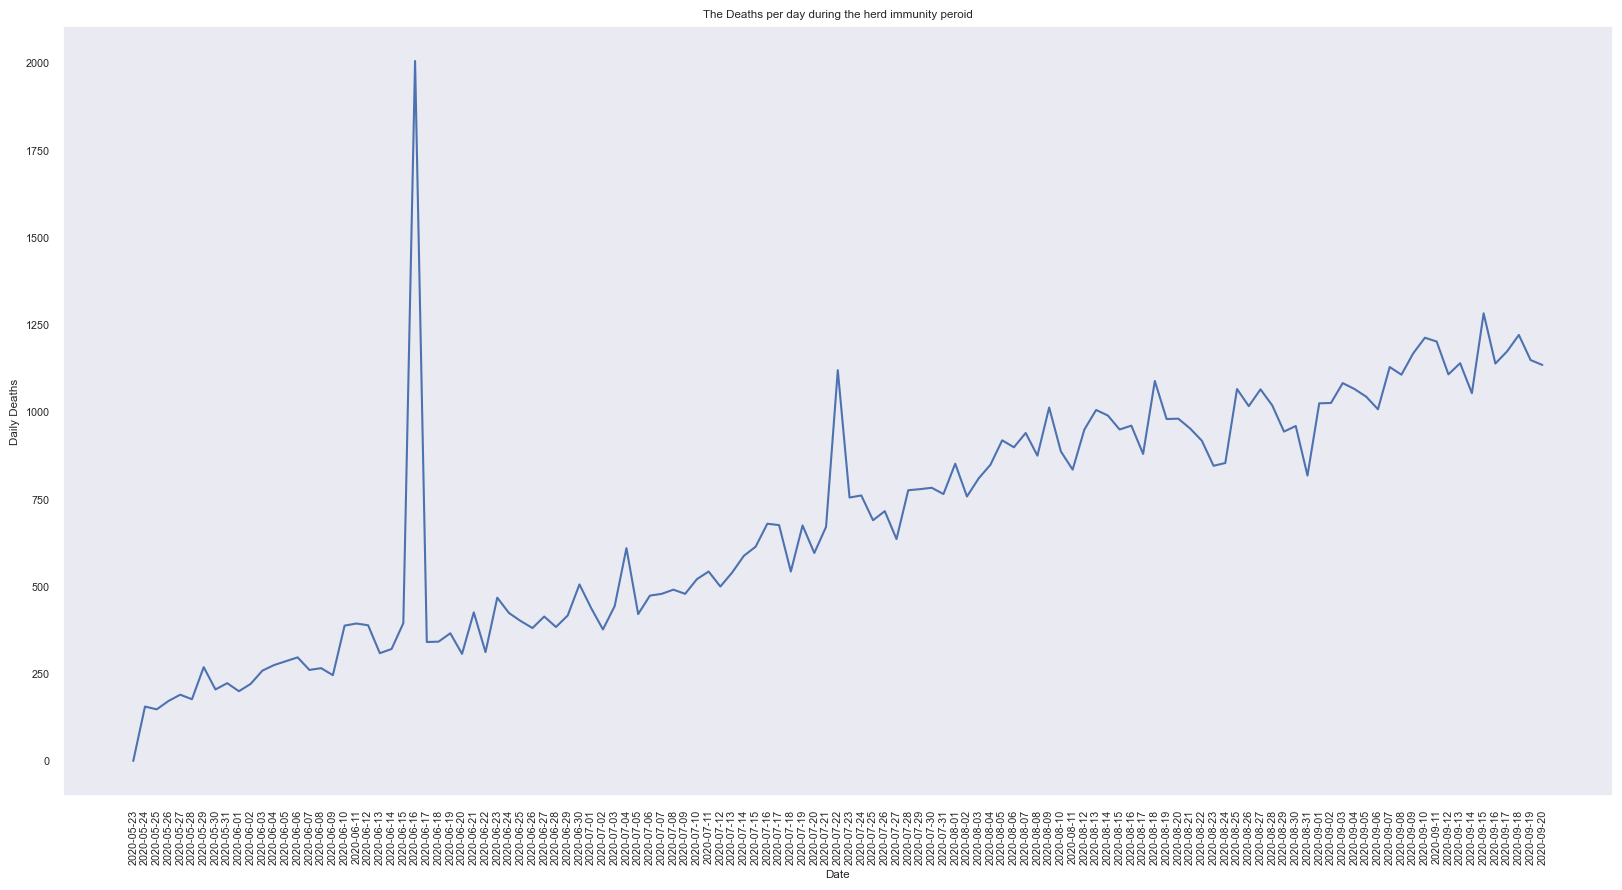

In [9]:
sns.set(font_scale = 0.7)
sns.set_style("dark") 
#print(set(pd.DatetimeIndex(df_India_Herd['Date']).month))
plot1 = sns.lineplot(x = "Date", y = "Daily_deaths", data = df_herd_India, legend = "full")
plot1.set(xlabel = "Date",ylabel = "Daily Deaths", title = "The Deaths per day during the herd immunity peroid" )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

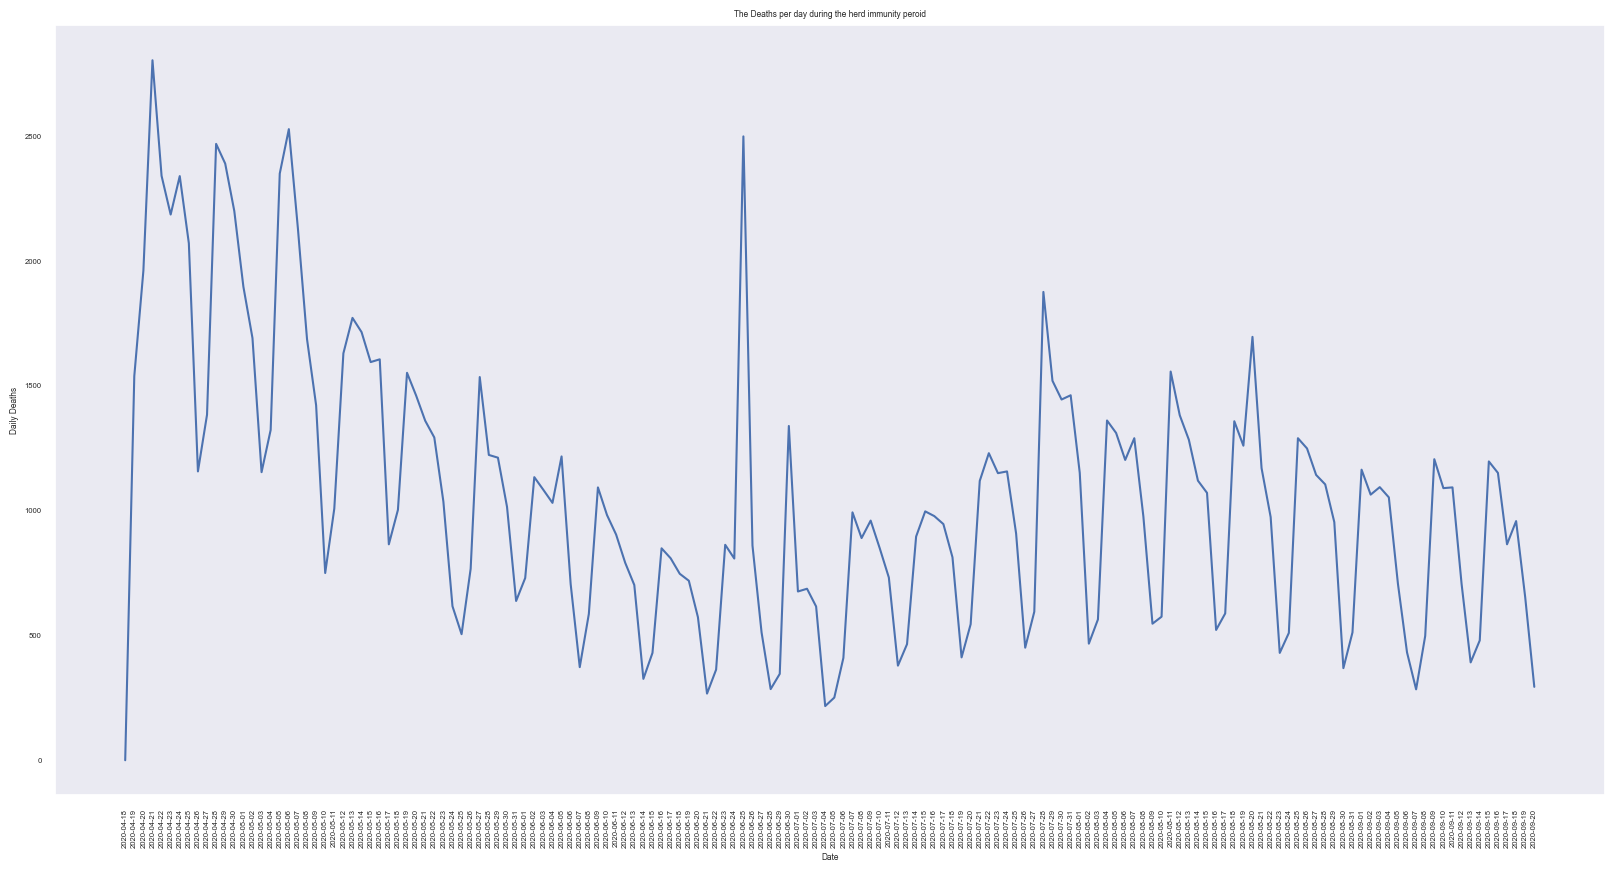

In [18]:
sns.set(font_scale = 0.5)
sns.set_style("dark") 
#print(set(pd.DatetimeIndex(df_India_Herd['Date']).month))
plot1 = sns.lineplot(x = "Date", y = "Daily_deaths", data = df_herd_US, legend = "full")
plot1.set(xlabel = "Date",ylabel = "Daily Deaths", title = "The Deaths per day during the herd immunity peroid" )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

I used the deaths because they are a good indicator of people's immunity. The more immune people are to covid-19, the less deaths there would be.

Both India and US saw spikes in the number of deaths. However, the magnitude of the US' spikes gradually decreases as time goes on. Furthermore, while India's daily cases have rising trend, it is increseing at a decreasing rate. Both of these suggests that during the herd immunity period, immunity against covid-19 increased. 

           Date  Total_Cases  Total_Deaths  Daily_deaths  Daily_cases
36   2020-05-23     131423.0        3868.0           0.0          0.0
38   2020-05-24     138536.0        4024.0         156.0       7113.0
40   2020-05-25     144950.0        4172.0         148.0       6414.0
42   2020-05-26     150793.0        4344.0         172.0       5843.0
44   2020-05-27     158086.0        4534.0         190.0       7293.0
..          ...          ...           ...           ...          ...
268  2020-09-16    5115893.0       83230.0        1139.0      97859.0
270  2020-09-17    5212686.0       84404.0        1174.0      96793.0
272  2020-09-18    5305475.0       85625.0        1221.0      92789.0
274  2020-09-19    5398230.0       86774.0        1149.0      92755.0
276  2020-09-20    5485612.0       87909.0        1135.0      87382.0

[121 rows x 5 columns]


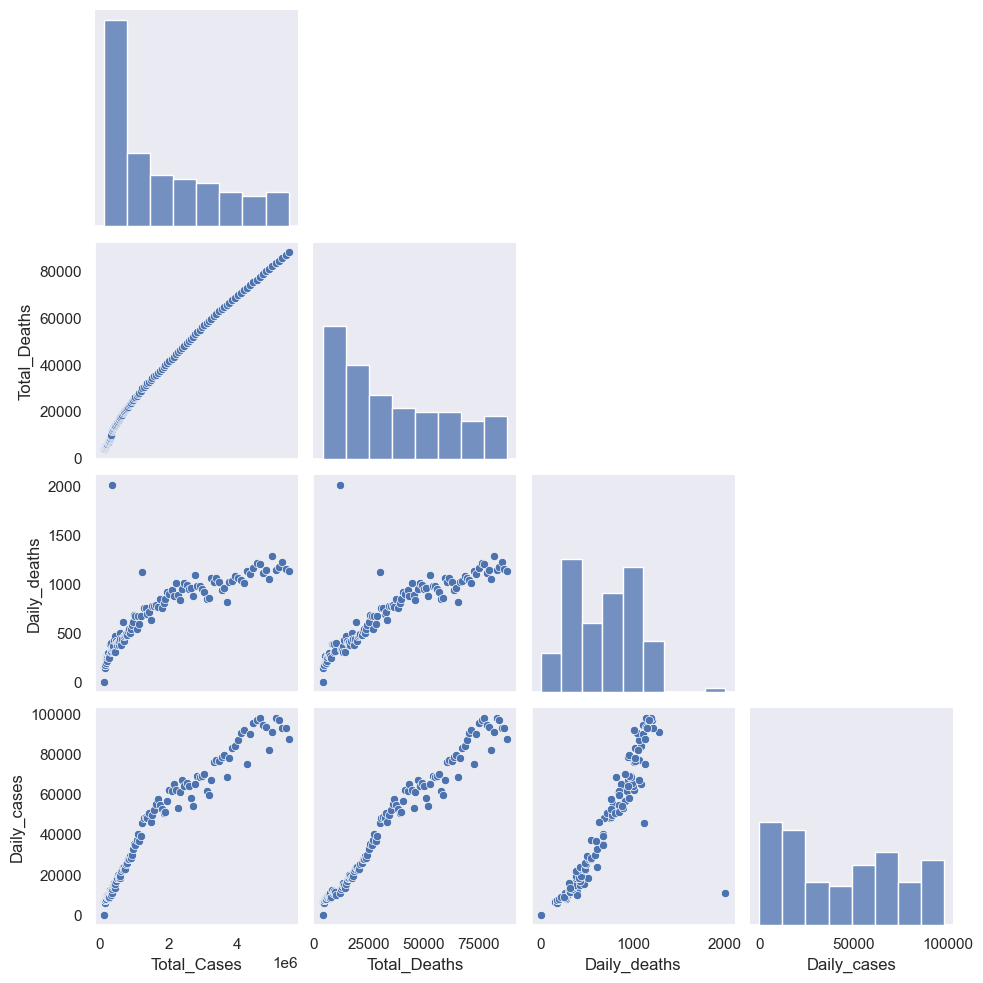

In [26]:

df_India_Herd_temp = df_herd_India
sns.set_style("dark")
df_India_Herd_temp = df_India_Herd_temp.drop(labels = ["Active_Cases", "Country", "Serious_or_Critical", "Population", "Total_Recovered", "Total_Tests"], axis =1 )
print(df_India_Herd_temp)

sns.pairplot(data = df_India_Herd_temp, kind = "scatter", diag_kind = "hist", corner = True)
plt.show()

# Conclusion



Research Question 1: 

From the first two graphs, it was pretty evident the number of cases were increasing during the lockdown. Looking at the scatter graph of daily cases. a steady increase in cases as well as a postive correlation can be seen. Both of these factors are evidence that suggests that the lockdown was not able to stop the speard of covid-19 however, it was able to limit it. This is seen from the bar plot with %Active cases. While the %Active also increaed at a steady rate, during the lockdown, the percantage maxed out at 0.007% which is very miniscule.




Research Question 2:

Herd Immunity, although, was not able to fully stop covid-19, it was able to limit the spread as well as increase immunity. Looking at the scatter graph comparing the critial and serious cases, we can see that both India and US experince some spikes in Serious or Critial cases. In the case of the US, these spikes decrease both in quanity and magnitude as time progresses. This suggests that there were less critical and serious cases as the pandemic progressed which in turn is evidence for increased immunity. In addition to that, much like the US, India also sees a decrease in the magnitude of the spikes which is further evidence of increased immunity. Both of these suggest that herd immunity was indeed effective in fighting against covid-19. The line graphs for the daily deaths also shows a similar results. For the US, we see an overal decrease in the magnitude of the spikes in the daily deaths. In case of India, it can be seen that while the number of daily deaths increase, the rate of increase decreases slightly. This suggests that Herd Immunity increased people's immunity which in turn is evidence that it is indeed a viable way of dealing with covid-19. Further evidence of this is seen through the pairplot. In the pairplot, we see from Daily_cases vs Daily_deaths that daily cases saw a much greater increase than the daily deaths which in turn suggests greater immunity. Furthermore, we see a significant decrease in the graident of Total_Deaths vs Daily_deaths which suggests that in the grand scheme of things, the number of deaths decreased.

In [27]:
df_India_lockdown1

,Date,Country,Total_Cases,%Active,Daily_cases
0,2020-05-23,India,131423.0,0.005290,0.0
1,2020-05-24,India,138536.0,0.005554,7113.0
2,2020-05-25,India,144950.0,0.005790,6414.0
3,2020-05-26,India,150793.0,0.005941,5843.0
4,2020-05-27,India,158086.0,0.006204,7293.0
5,2020-05-28,India,165386.0,0.006490,7300.0
6,2020-05-29,India,173491.0,0.006210,8105.0
7,2020-05-30,India,181827.0,0.006486,8336.0
8,2020-05-31,India,190609.0,0.006750,8782.0
9,2020-06-01,India,198370.0,0.007014,7761.0


In [28]:
df_herd

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Serious_or_Critical,Active_Cases
0,2020-04-18,USA,331441624,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-19,USA,331441624,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,2020-04-20,USA,331441624,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,2020-04-21,USA,331441624,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,2020-04-22,USA,331441624,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0
...,...,...,...,...,...,...,...,...,...
272,2020-09-18,India,1383048851,61572343.0,5305475.0,85625.0,4205201.0,8944.0,1014649.0
273,2020-09-19,USA,331441624,97310312.0,6967403.0,203824.0,4223693.0,14084.0,2539886.0
274,2020-09-19,India,1383048851,62454254.0,5398230.0,86774.0,4299724.0,8944.0,1011732.0
275,2020-09-20,USA,331441624,98166609.0,7009844.0,204118.0,4251489.0,14020.0,2554237.0
